# PyTorch MLP Image Classifier 

## 1. Data processing and imports 

In [158]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader
from util import *

In [159]:
import pickle
in_file = open('processed_data/norm_fmnist.pkl', 'rb')
training_data = pickle.load(in_file)

In [160]:
new_in_file = open('processed_data/test_norm_fmnist.pkl', 'rb')
test_data = pickle.load(new_in_file)

Data is a list of the form `[(x,y), (x,y),..., (x,y)]` where each `x` is normalized jnp float array and each `y` is a single float representing the label. 

In [212]:
from torch.utils.data import Dataset, TensorDataset

class GetDataset(Dataset):
    def __init__(self, data_set): # samples and labels are stored in tuples in data_set (list)
        self.data_distribution = data_set
    
    def __getitem__(self, index):
        sample = self.data_distribution[index][0]
        sample_numpy = np.array(sample)
        label = self.data_distribution[index][1]
        label = int(label)
        # sample_numpy = np.expand_dims(sample_numpy, axis=0)  # (28, 28) --> (1, 28, 28)
        return (torch.tensor(sample_numpy, dtype=torch.float), torch.tensor(label))
    
    def __len__(self):
        return len(self.data_distribution)

In [213]:
trainset = GetDataset(training_data)
testset = GetDataset(test_data)

In [214]:
testset[0][0].shape

torch.Size([28, 28])

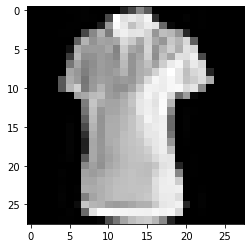

In [215]:
plot_tensor(trainset[0][0], False)

In [219]:
print(trainset[0][1])

tensor(1)


In [220]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1)  
testloader = torch.utils.data.DataLoader(testset, batch_size=1)

## 2. Model

In [221]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = torch.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [222]:
net = Net()

In [223]:
out = net(trainset[0][0])
out.shape

torch.Size([2])

In [225]:
loss(out, trainset[0][1])

tensor(0.6931, grad_fn=<NllLossBackward0>)

## 3. Train 

In [227]:
import torch.optim as optim
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [230]:
epoch_num = 0
epoch_losses = []

for epoch in range(200):  # loop over the dataset (1) time 
    epoch_num += 1
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data[0]
        labels = data[1]
        labels = torch.squeeze(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss_val = loss(outputs, labels)
        loss_val.backward()
        optimizer.step()
        
        running_loss += loss_val
    
    epoch_loss = (running_loss/len(trainloader)).detach().numpy()
    epoch_losses.append(epoch_loss)
    print('Loss epoch {}: '.format(epoch_num), epoch_loss)

Loss epoch 1:  0.62555623
Loss epoch 2:  0.43268397
Loss epoch 3:  0.23443429
Loss epoch 4:  0.1144735
Loss epoch 5:  0.060895164
Loss epoch 6:  0.037609085
Loss epoch 7:  0.025958525
Loss epoch 8:  0.019297546
Loss epoch 9:  0.015087181
Loss epoch 10:  0.012235252
Loss epoch 11:  0.010199953
Loss epoch 12:  0.008686128
Loss epoch 13:  0.007524108
Loss epoch 14:  0.006607208
Loss epoch 15:  0.0058713355
Loss epoch 16:  0.0052663926
Loss epoch 17:  0.0047629243
Loss epoch 18:  0.0043386966
Loss epoch 19:  0.003976644
Loss epoch 20:  0.0036651185
Loss epoch 21:  0.0033933672
Loss epoch 22:  0.0031558466
Loss epoch 23:  0.0029460995
Loss epoch 24:  0.0027597605
Loss epoch 25:  0.0025934237
Loss epoch 26:  0.002444003
Loss epoch 27:  0.0023091706
Loss epoch 28:  0.0021872425
Loss epoch 29:  0.0020759797
Loss epoch 30:  0.0019746884
Loss epoch 31:  0.0018817498
Loss epoch 32:  0.0017964763
Loss epoch 33:  0.0017176893
Loss epoch 34:  0.0016450178
Loss epoch 35:  0.0015776961
Loss epoch 36: 

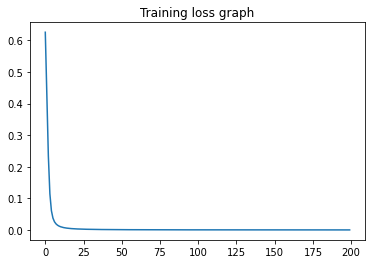

In [231]:
import matplotlib.pyplot as plt
plt.plot(epoch_losses)
plt.title("Training loss graph")
plt.show()

In [232]:
# save 
PATH = 'torchclassifier.pth'
torch.save(net.state_dict(), PATH)

## 4. Test 

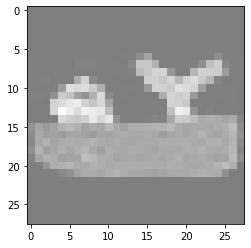

In [234]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

/var/folders/yr/h50vvmwd40j7y71yyrp_bb5r0000gr/T/ipykernel_13471/3410450893.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  normalized_logits = F.softmax(logits)


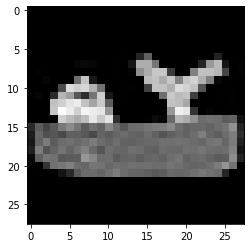

Ground truth:  0
Predicted label:  0


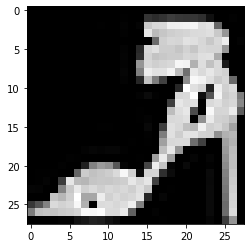

Ground truth:  0
Predicted label:  0


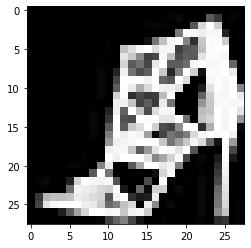

Ground truth:  0
Predicted label:  0


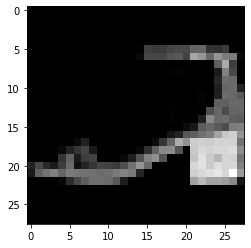

Ground truth:  0
Predicted label:  0


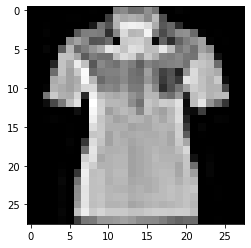

Ground truth:  1
Predicted label:  1


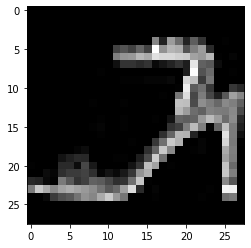

Ground truth:  0
Predicted label:  0


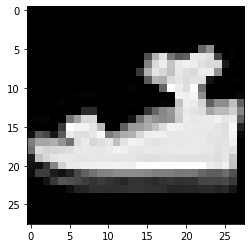

Ground truth:  0
Predicted label:  0


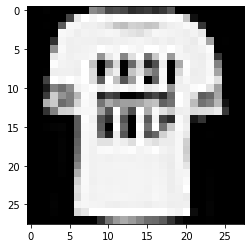

Ground truth:  1
Predicted label:  1


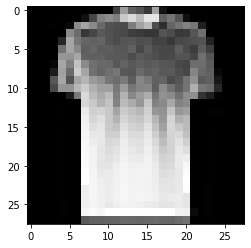

Ground truth:  1
Predicted label:  1


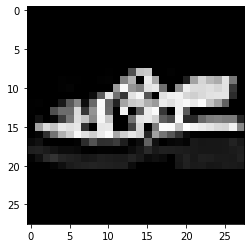

Ground truth:  0
Predicted label:  0


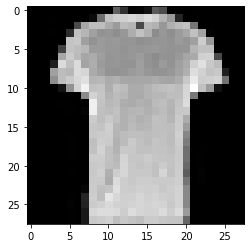

Ground truth:  1
Predicted label:  1


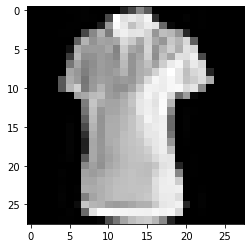

Ground truth:  1
Predicted label:  1


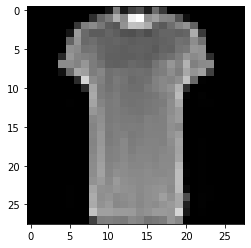

Ground truth:  1
Predicted label:  1


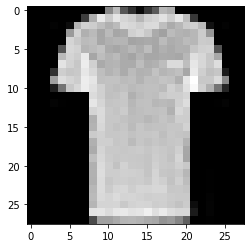

Ground truth:  1
Predicted label:  1


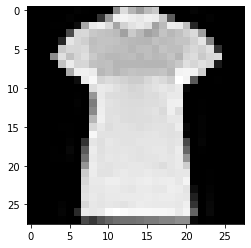

Ground truth:  1
Predicted label:  1


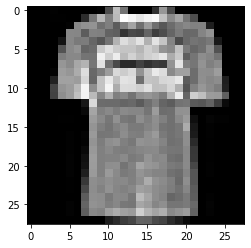

Ground truth:  1
Predicted label:  1


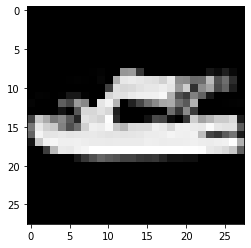

Ground truth:  0
Predicted label:  0


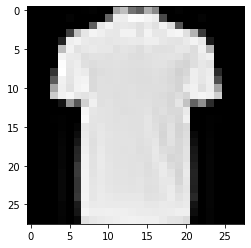

Ground truth:  1
Predicted label:  1


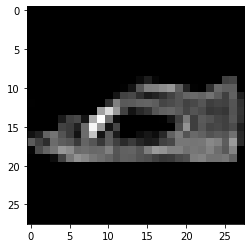

Ground truth:  0
Predicted label:  0


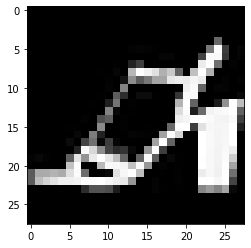

Ground truth:  0
Predicted label:  0
Accuracy on test set:  1.0


In [254]:
accuracy_count = 0
idx_count = 0

for data in testloader:
    # setup 
    inputs = data[0]
    labels = data[1]
    label = labels.item()
    logits = net(inputs)
    normalized_logits = F.softmax(logits)
    preds = torch.argmax(normalized_logits)
    pred = preds.item()
    
    # calculate 
    if (label == pred):
        accuracy_count += 1
    idx_count += 1
    
    # display 
    plot_tensor(inputs, False)
    print("Ground truth: ", label)
    print("Predicted label: ", pred)
    
total_accuracy = accuracy_count/idx_count
print("Accuracy on test set: ", total_accuracy)